In [1]:
from keras.models import load_model
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Leemos el modelo guardado
model = load_model('../../model/classification/image_classification_CNN.h5')

In [3]:
test_data_dir = '../../dataset/classification/PCB_Dataset_Split/test'
size = (360, 363)
batch_size = 16

In [10]:
# Leemos una imagen del conjunto de test 
image = load_img('../../dataset/classification/PCB_Dataset_Split/val/neutrophil/BNE_191041.jpg', target_size = size)
img = np.array(image)
img = img / 255.0
img = img.reshape(1, 360, 363, 3)

In [11]:
# Predecimos la clase a la que pertenece
label = model.predict(img)

1/1 [==============================] - 0s 26ms/step


In [12]:
# Mapeamos la predicción con el nombre de la salida
label_names = ['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']
print(label_names[np.argmax(label)])

neutrophil


In [13]:
label

array([[6.6474173e-04, 4.9071365e-05, 1.1076842e-03, 2.6778722e-02,
        5.4529850e-05, 3.3029503e-06, 9.7134173e-01, 3.2414894e-07]],
      dtype=float32)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1. / 255)
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size = size,
                                                  batch_size = batch_size,
                                                  shuffle = False,
                                                  class_mode = 'categorical')

Found 1716 images belonging to 8 classes.


In [9]:
test_score = model.evaluate_generator(test_generator, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

C:\Users\shiru\AppData\Local\Temp\ipykernel_8692\558093203.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(test_generator, batch_size)


[INFO] accuracy: 98.44%
[INFO] Loss:  0.1844080686569214


In [16]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')#Print the Target names

108/108 [==============================] - 10s 93ms/step
Confusion Matrix
Confusion matrix, without normalization


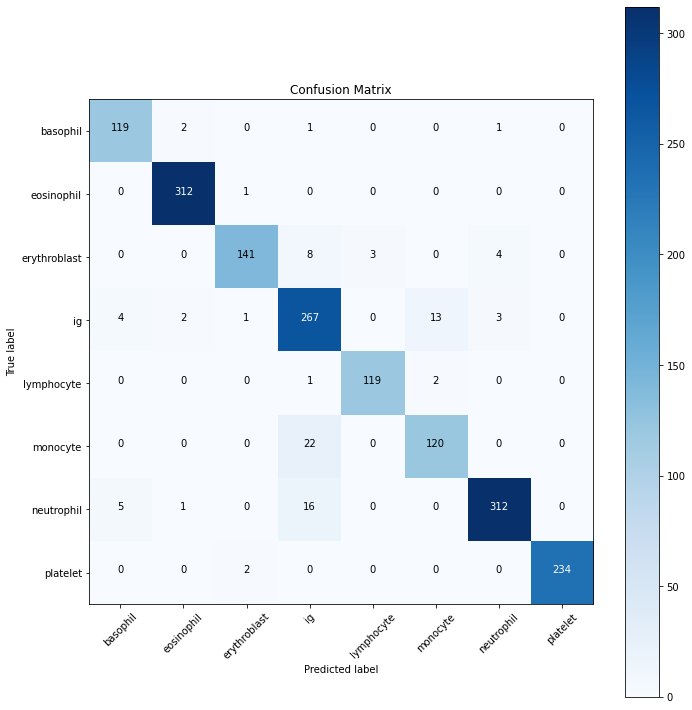

In [17]:
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

#shuffle=False

target_names = []
for key in test_generator.class_indices:
    target_names.append(key)

# print(target_names)#Confution Matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix', normalize=False)

#Print Classification Report
#print('Classification Report')
#print(classification_report(test_generator.classes, y_pred, target_names=target_names))